## Explaining SHAP

#### Importing Libraries

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [134]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [135]:
import shap

In [136]:
from sklearn import datasets

#### Importing python dataset and assigning variable names

In [137]:
df = pd.DataFrame(datasets.load_wine().data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [138]:
df.columns = ['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11', 'var12','target']

#### Using Ensembling model to train and predict

### Random forest

In [139]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)
y = df['target']
X = df[["var1","var2","var3","var4","var5","var6","var7","var8","var9","var10","var11","var12"]]

In [140]:
# Build the model with the random forest regression
model2 = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model2.fit(X, y)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

* Prediction using original model

In [141]:
model2.predict(X)

array([ 999.06852869, 1021.43846395, 1185.18155345, 1292.42242647,
        866.21111111, 1349.00238095, 1190.2530754 , 1224.64277882,
       1163.52105263, 1120.38085901, 1317.07056244, 1190.72437533,
       1115.33494152, 1210.98216374, 1483.78333333, 1319.12936508,
       1248.76152882, 1232.21986216, 1485.1       , 1009.86925187,
        870.40716374,  817.68872475, 1003.98817155,  858.12818381,
        972.88194444,  864.30277778, 1110.12073474,  819.26850649,
        906.61495726,  880.94698455, 1213.75597327, 1389.07383041,
        996.2093254 , 1248.27541771, 1027.03045113, 1002.42081628,
        953.39711779,  992.43693381,  913.83223684,  875.5218254 ,
       1029.85585901,  909.64473684, 1109.26476469,  828.03333333,
        943.95908425, 1083.9762903 ,  966.46697012,  992.21697012,
       1207.21827485, 1213.5245098 , 1001.7977193 , 1181.44940275,
       1192.3009979 , 1272.23375104, 1088.35386383, 1151.9025852 ,
       1057.75863679, 1237.09883041, 1233.19404762,  519.59004

In [142]:
# OBSERVATION 1 prediction
model2.predict(X)[0]

999.0685286935286

In [143]:
#__________________________________________________________________________________________________________________________

* <b> Kernel shap

In [144]:
# Using Kernel shap to approximate shapley values

# shapley kernel is used to overcome the complexity of making numereous coalitions.

masker = shap.maskers.Independent(X, 50)
explainer1 = shap.KernelExplainer(model2.predict, masker.data)

shap_values1 = explainer1.shap_values(X)

# takes 3-4 mins to complete

  0%|          | 0/178 [00:00<?, ?it/s]

In [145]:
shap_values1

array([[ 75.87528202,   1.9697169 ,  -1.05351812, ...,  42.97698837,
         -5.58638493,  -9.26751545],
       [109.38637655,   6.370016  ,   2.24877881, ..., -29.51334973,
         25.6234012 ,  -5.06159671],
       [118.35700306,   6.23191888,   6.38754671, ...,  80.51647849,
         -4.08600872,  12.71460111],
       ...,
       [ 92.32795446,   5.68822327,   8.13726212, ...,  69.02129772,
         -8.79570023, -12.7567616 ],
       [ 87.54171511,  -1.75349224,   4.18504244, ...,  73.06143887,
        -10.93457889, -14.29554468],
       [ 40.54435542,  -3.84868159,  -4.69184842, ...,  72.87098916,
         -7.76072865, -33.65005465]])

In [146]:
# Null model prediction (Avg_prediction)
explainer1.expected_value

711.5330736589262

In [147]:
shap_values1.shape

(178, 12)

In [148]:
# Shapley values in Dataframe
shap_frame1 = pd.DataFrame(shap_values1,columns=X.columns)
shap_frame1

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,75.875282,1.969717,-1.053518,10.176694,46.414549,-1.693969,130.214820,1.836611,-4.327819,42.976988,-5.586385,-9.267515
1,109.386377,6.370016,2.248779,7.434595,59.640506,-6.734621,127.896414,3.954513,8.660356,-29.513350,25.623401,-5.061597
2,118.357003,6.231919,6.387547,8.081191,61.656481,-2.299600,181.492909,1.026592,3.569368,80.516478,-4.086009,12.714601
3,129.873061,2.250239,24.034355,11.948614,75.679290,-7.643572,229.611594,8.856249,-1.042631,150.798979,-2.047688,-41.429136
4,88.147085,-0.854084,-20.799804,-2.676615,67.750996,0.878972,102.284299,-1.834601,-2.297825,-87.873595,-1.009589,12.962799
...,...,...,...,...,...,...,...,...,...,...,...,...
173,40.713431,1.868841,4.667703,1.252943,19.445381,3.437136,-169.324271,-1.883926,-0.355772,70.563753,-6.205036,-20.583712
174,69.793210,4.213005,4.232022,-3.132412,34.562726,1.635567,-144.044659,-1.949645,3.882719,54.037524,-5.378817,-25.284315
175,92.327954,5.688223,8.137262,0.899374,45.913377,15.996326,-117.733288,-1.773426,10.160621,69.021298,-8.795700,-12.756762
176,87.541715,-1.753492,4.185042,0.930707,41.445278,12.038820,-144.846868,-0.782612,2.960355,73.061439,-10.934579,-14.295545


In [149]:
# prediction
y_pred = model2.predict(X)
y_pred[0]

999.0685286935286

In [150]:
# Explanatory model (additive)
explainer1.expected_value + np.sum(shap_frame1.iloc[0,:])

999.0685286935287

In [151]:
# shapley value for 1st observation 
obs = pd.DataFrame(shap_frame1.iloc[0,:]).T
obs["Model_pred"] = y_pred[0]
obs["K_Shap_pred"] = explainer1.expected_value + np.sum(shap_frame1.iloc[0,:])

obs

#final prediction = the average prediction + the shap values of all features.

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,Model_pred,K_Shap_pred
0,75.875282,1.969717,-1.053518,10.176694,46.414549,-1.693969,130.21482,1.836611,-4.327819,42.976988,-5.586385,-9.267515,999.068529,999.068529


### Feature importance for an observation (local interpretability)

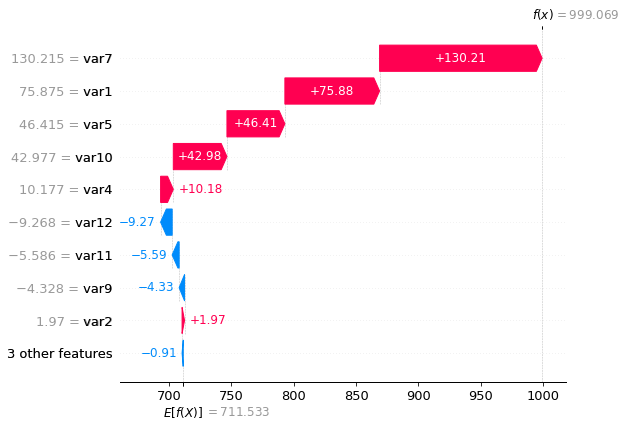

In [152]:
# WATERFALL plot 

shap_object1 = shap.Explanation(base_values = explainer1.expected_value,
                                values = shap_values1[0],
                                feature_names = X.columns,
                                data = shap_values1[0].data)

shap.plots.waterfall(shap_object1)

### Variable importance for prediction using  Mean of absolute shap values(global interpretability)

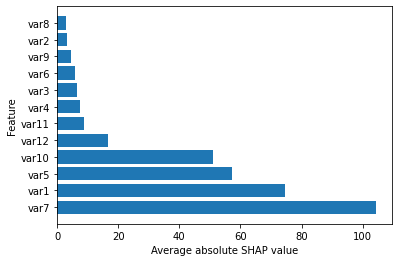

In [153]:
# calculate feature importance
importance_values = pd.DataFrame(abs(shap_values1).mean(0), index=X.columns, columns=['importance'])
importance_values = importance_values.sort_values('importance', ascending=False)

# plot feature importance
plt.barh(importance_values.index, importance_values['importance'])
plt.xlabel('Average absolute SHAP value')
plt.ylabel('Feature')
plt.show()

### Variable summary plot using shapley values

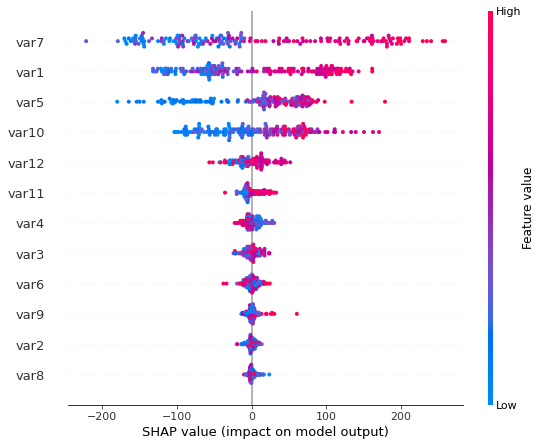

In [154]:
# Beeswarm plot to see the relation of the features with the target using shap values
shap.summary_plot(shap_values1,X)

In [155]:
#____________________________________________________________________________________________________________________________

* <b> Tree shap

In [156]:
explainer2 = shap.TreeExplainer(model2)
shap_values2 = explainer2.shap_values(X)

In [157]:
shap_values2

array([[105.70985708,   0.87980941,  -7.11967458, ...,  29.36141094,
        -14.0923699 ,  -6.43342908],
       [134.32810441,   4.4942722 ,   6.25138727, ..., -39.1159837 ,
         10.94086139,  -7.75705992],
       [154.95855426,  10.19061717,   7.82059599, ...,  45.83136072,
        -10.23160098,  26.92975475],
       ...,
       [121.68026071,   4.31261928,   8.0956834 , ...,  65.24561238,
        -11.78071138, -11.8269734 ],
       [119.20081308,  -4.06986823,   4.34328392, ...,  69.88778191,
        -12.73695462, -12.95811611],
       [ 79.57865253,  -0.59949956,  -0.82401084, ...,  70.3141309 ,
         -8.86600754, -31.35985916]])

In [158]:
# Null model prediction (Avg_prediction)
explainer2.expected_value

array([734.37865169])

In [159]:
shap_values2.shape

(178, 12)

In [160]:
# Shapley values in Dataframe
shap_frame2 = pd.DataFrame(shap_values2,columns=X.columns)
shap_frame2

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12
0,105.709857,0.879809,-7.119675,5.657849,22.371670,14.919222,117.406656,0.983594,-4.954719,29.361411,-14.092370,-6.433429
1,134.328104,4.494272,6.251387,5.967149,34.546263,-1.732115,129.435534,2.017070,7.684330,-39.115984,10.940861,-7.757060
2,154.958554,10.190617,7.820596,6.914834,32.626164,-1.774969,172.452698,1.394941,3.689952,45.831361,-10.231601,26.929755
3,166.524024,2.364679,21.338395,8.439805,50.359536,-1.818063,206.959382,6.526256,1.275474,138.789260,-5.977293,-36.737682
4,119.697291,-0.757032,-11.109788,-4.236983,46.431840,-0.366365,109.444645,-1.164736,-2.749784,-133.470875,-11.502534,21.616782
...,...,...,...,...,...,...,...,...,...,...,...,...
173,76.977265,3.381795,5.559797,1.262372,15.609652,2.208583,-228.693596,-1.320037,2.082553,69.477750,-8.535087,-17.260154
174,98.831380,6.812905,5.185487,-2.834599,34.176934,-0.799982,-196.648993,-1.730009,4.691783,52.478307,-7.029661,-23.412205
175,121.680261,4.312619,8.095683,-0.045861,49.824562,9.596151,-159.573484,-1.677847,10.389668,65.245612,-11.780711,-11.826973
176,119.200813,-4.069868,4.343284,-0.150311,45.842000,7.567613,-192.753144,-1.163579,3.695163,69.887782,-12.736955,-12.958116


In [161]:
# prediction
y_pred = model2.predict(X)
y_pred[0]

999.0685286935286

In [162]:
# Explanatory model (additive)
explainer2.expected_value + np.sum(shap_frame2.iloc[0,:])

array([999.06852869])

In [163]:
# shapley value for 1st observation 
obs = pd.DataFrame(shap_frame2.iloc[0,:]).T
obs["Model_pred"] = y_pred[0]
obs["T_Shap_pred"] = explainer2.expected_value + np.sum(shap_frame2.iloc[0,:])

obs
#final prediction = the average prediction + the shap values of all features.

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,Model_pred,T_Shap_pred
0,105.709857,0.879809,-7.119675,5.657849,22.37167,14.919222,117.406656,0.983594,-4.954719,29.361411,-14.09237,-6.433429,999.068529,999.068529


In [164]:
explainer.expected_value

array([734.37865169])

In [170]:
explainer2.expected_value[0]

734.3786516853932

In [167]:
shap_values2[0]

array([105.70985708,   0.87980941,  -7.11967458,   5.65784936,
        22.37166968,  14.91922234, 117.40665626,   0.98359416,
        -4.95471867,  29.36141094, -14.0923699 ,  -6.43342908])

In [168]:
X.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12'],
      dtype='object')

In [169]:
shap_values2[0].data

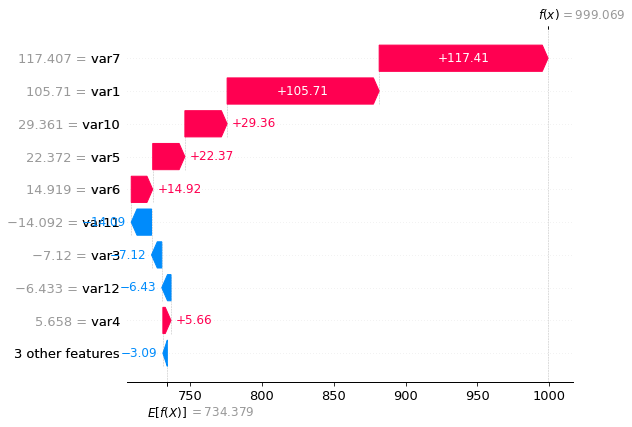

In [171]:
# WATERFALL plot 

shap_object2 = shap.Explanation(base_values = explainer2.expected_value[0],
                                values = shap_values2[0],
                                feature_names = X.columns,
                                data = shap_values2[0].data)

shap.plots.waterfall(shap_object2)

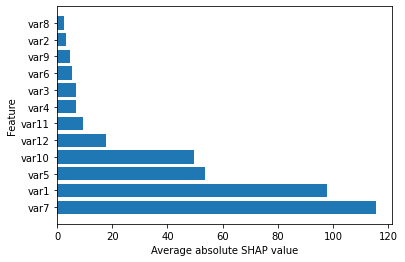

In [172]:
# calculate feature importance
importance_values = pd.DataFrame(abs(shap_values2).mean(0), index=X.columns, columns=['importance'])
importance_values = importance_values.sort_values('importance', ascending=False)

# plot feature importance
plt.barh(importance_values.index, importance_values['importance'])
plt.xlabel('Average absolute SHAP value')
plt.ylabel('Feature')
plt.show()

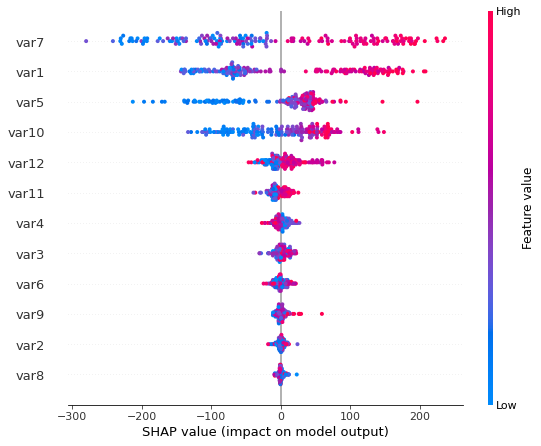

In [173]:
# Beeswarm plot to see the relation of the features with the target using shap values
shap.summary_plot(shap_values2,X)